# Predict film popularity using machine learning

A machine learning model to predict the popularity of a film based on its characteristics

In [580]:
## import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [581]:
my_data = pd.read_csv("data/train.csv")

## Data exploration
my_data = my_data.drop("title_index", axis = 1)

In [582]:
%%capture
my_data["country"] = my_data["country"].fillna("Unknown")
my_data["language"] = my_data["language"].fillna("Unknown")
my_data["director"].fillna("Unknown", inplace = True)
my_data["writer"].fillna("Unknown", inplace = True)
my_data["production_company"].fillna("Unknown", inplace = True)
my_data["actors"].fillna("Unknown", inplace = True)
my_data["description"].fillna("Unknown", inplace = True)

# Fix us_gross_income col

In [583]:
my_data['usa_gross_income'] = my_data['usa_gross_income'].str.replace('$', "", regex = False)

In [584]:
index = 0
val = []
for data in my_data['usa_gross_income']:
    #print(data)
    if pd.notnull(data) and 'EUR' in data:
        print(data)
        val.append(index)
    index = index + 1
print(val)
#print(my_data['usa_gross_income'][10998])

EUR 252076
[10344]


In [585]:
%%capture
my_data["usa_gross_income"][10344] = '272254'
my_data["usa_gross_income"][10344]

In [586]:
index = 0
val = []
for data in my_data['usa_gross_income']:
    #print(data)
    if pd.notnull(data) and 'GBP' in data:
        print(data)
        val.append(index)
    index = index + 1
print(val)

GBP 32000
GBP 438200
GBP 485300
[10998, 24027, 58096]


In [587]:
%%capture
for index in val:
    my_data['usa_gross_income'][index] = my_data['usa_gross_income'][index].replace("GBP", "")
    my_data['usa_gross_income'][index] = int(my_data['usa_gross_income'][index])*126/100
    print(my_data['usa_gross_income'][index])

In [588]:
my_data['usa_gross_income'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65846 entries, 0 to 65845
Series name: usa_gross_income
Non-Null Count  Dtype 
--------------  ----- 
11746 non-null  object
dtypes: object(1)
memory usage: 514.6+ KB


In [589]:
my_data['usa_gross_income'] = pd.to_numeric(my_data['usa_gross_income'],errors='coerce' )

In [590]:
mean = my_data['usa_gross_income'].mean()
my_data['usa_gross_income'].fillna(mean, inplace = True)

C:\Users\minha\AppData\Local\Temp\ipykernel_8184\4088441139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  my_data['usa_gross_income'].fillna(mean, inplace = True)


# Fix worldwide_gross_income col


In [591]:
my_data['worlwide_gross_income'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65846 entries, 0 to 65845
Series name: worlwide_gross_income
Non-Null Count  Dtype 
--------------  ----- 
23703 non-null  object
dtypes: object(1)
memory usage: 514.6+ KB


In [592]:
my_data['worlwide_gross_income'] = my_data['worlwide_gross_income'].str.replace('$', "", regex = False)

In [593]:
index = 0
val = []
for data in my_data['worlwide_gross_income']:
    #print(data)
    if type(data) == str and ('NPR' in data):
        #print(data)
        val.append(index)
    index = index + 1
print(val)
print(my_data['worlwide_gross_income'][val])

[35512]
35512    NPR 20000000
Name: worlwide_gross_income, dtype: object


In [594]:
%%capture
for index in val:
    my_data["worlwide_gross_income"][index] = my_data['worlwide_gross_income'][index].replace('NPR','')
    my_data["worlwide_gross_income"][index] = int(my_data["worlwide_gross_income"][index])/133.18

In [595]:
%%capture
index = 0
val = []
for data in my_data['worlwide_gross_income']:
    #print(data)
    if type(data) == str and ('INR' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["worlwide_gross_income"][index] = my_data['worlwide_gross_income'][index].replace('INR','')
    my_data["worlwide_gross_income"][index] = int(my_data["worlwide_gross_income"][index])*0.012

In [596]:
%%capture
index = 0
val = []
for data in my_data['worlwide_gross_income']:
    #print(data)
    if type(data) == str and ('GBP' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["worlwide_gross_income"][index] = my_data['worlwide_gross_income'][index].replace('GBP','')
    my_data["worlwide_gross_income"][index] = int(my_data["worlwide_gross_income"][index])*1.26

In [597]:
my_data['worlwide_gross_income'] = pd.to_numeric(my_data['worlwide_gross_income'])

In [598]:
%%capture
mean = my_data['worlwide_gross_income'].mean()
my_data['worlwide_gross_income'].fillna(mean, inplace = True)

# Fix budget col

In [599]:
my_data['budget']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
65841    $ 2111250
65842          NaN
65843          NaN
65844     $ 464000
65845          NaN
Name: budget, Length: 65846, dtype: object

In [600]:
my_data['budget'] = my_data['budget'].str.replace('$', "", regex = False)

In [601]:
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('FRF' in data):
        #print(data)
        val.append(index)
    index = index + 1
print(val)
print(my_data['budget'][val])

[20, 92, 941, 1268, 1774, 2142, 2634, 3522, 4475, 4600, 4862, 5601, 5992, 6985, 8119, 10058, 10087, 10630, 11472, 12673, 12700, 12951, 14069, 14744, 15404, 15510, 16264, 20163, 21494, 21864, 21878, 22260, 22780, 22927, 24797, 24876, 25692, 25841, 27107, 27148, 27250, 28120, 28582, 29774, 30232, 30359, 30832, 31839, 33225, 34349, 34968, 34988, 35376, 36099, 38105, 40874, 41475, 42158, 43198, 44465, 45464, 45909, 46324, 46602, 46814, 47488, 48702, 48904, 49016, 49465, 50518, 50724, 51476, 52286, 53503, 54495, 54927, 55389, 55455, 55647, 56240, 56302, 56314, 56485, 57858, 58381, 59810, 61136, 61344, 61423, 61785, 62597, 63258, 64058, 64146, 64843, 65209, 65259]
20        FRF 4700000
92        FRF 6000000
941      FRF 38000000
1268     FRF 80000000
1774     FRF 30000000
             ...     
64058    FRF 70000000
64146     FRF 5500500
64843    FRF 20000000
65209    FRF 17000000
65259    FRF 50000000
Name: budget, Length: 98, dtype: object


In [602]:
%%capture
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('FRF','')
    my_data["budget"][index] = int(my_data["budget"][index])/6.18

In [603]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('EUR' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('EUR','')
    my_data["budget"][index] = int(my_data["budget"][index])*1.08

In [604]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('GBP' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('GBP','')
    my_data["budget"][index] = int(my_data["budget"][index])*1.26

In [605]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('CAD' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('CAD','')
    my_data["budget"][index] = int(my_data["budget"][index])*1.35

In [606]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('AUD' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('AUD','')
    my_data["budget"][index] = int(my_data["budget"][index])*1.53

In [607]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('JPY' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('JPY','')
    my_data["budget"][index] = int(my_data["budget"][index])/151.44

In [608]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('EGP' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('EGP','')
    my_data["budget"][index] = int(my_data["budget"][index])/47.35

In [609]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('TRL' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('TRL','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.031

In [610]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('SEK' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('SEK','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.094

In [611]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('IRR' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('IRR','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.000024

In [612]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('PTE' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('PTE','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.00538522

In [613]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('NOK' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('NOK','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.092

In [614]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('MXN' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('MXN','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.060

In [615]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('HUF' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('HUF','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.0027

In [616]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('DKK' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('DKK','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.14

In [617]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('DEM' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('DEM','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.0035

In [618]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('THB' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('THB','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.027

In [619]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('ITL' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('ITL','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.00054

In [620]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('IDR' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('IDR','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.000063

In [621]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('CNY' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('CNY','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.14

In [622]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('CZK' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('CZK','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.043

In [623]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('ARS' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('ARS','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.0012

In [624]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('BRL' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('BRL','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.20

In [625]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('KRW' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('KRW','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.00074

In [626]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('RUR' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('RUR','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.011

In [627]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('NLG' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('NLG','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.49

In [628]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('DOP' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('DOP','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.017

In [629]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('HKD' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('HKD','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.13

In [630]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('NZD' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('NZD','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.60

In [631]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('AZM' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('AZM','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.59

In [632]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('SGD' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('SGD','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.74

In [633]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('PLN' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('PLN','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.25

In [634]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('BDT' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('BDT','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.0091

In [635]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('ESP' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('ESP','')
    my_data["budget"][index] = int(my_data["budget"][index])*1.08

In [636]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('MYR' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('MYR','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.211663

In [637]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('VND' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('VND','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.00004

In [638]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('BGL' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('BGL','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.55

In [639]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('ISK' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('ISK','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.0072

In [640]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('EEK' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('EEK','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.0690014

In [641]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('BEF' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('BEF','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.0267636

In [642]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('ROL' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('ROL','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.22

In [643]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('COP' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('COP','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.00026

In [644]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('LKR' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('LKR','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.0033

In [645]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('PHP' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('PHP','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.018

In [646]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('PKR' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('PKR','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.0036

In [647]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('SIT' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('SIT','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.0045114867

In [648]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('ZAR' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('ZAR','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.054

In [649]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('CHF' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('CHF','')
    my_data["budget"][index] = int(my_data["budget"][index])*1.11

In [650]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('ILS' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('ILS','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.27

In [651]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('CLP' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('CLP','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.0010

In [652]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('LVL' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('LVL','')
    my_data["budget"][index] = int(my_data["budget"][index])*1.65

In [653]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('NPR' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('NPR','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.0075

In [654]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('YUM' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('YUM','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.552499

In [655]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('TWD' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('TWD','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.031

In [656]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('GEL' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('GEL','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.37

In [657]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('AMD' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('AMD','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.0035

In [658]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('NGN' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('NGN','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.00076

In [659]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('HRK' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('HRK','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.14244

In [660]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('MTL' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('MTL','')
    my_data["budget"][index] = int(my_data["budget"][index])*2.51488

In [661]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('MNT' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('MNT','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.00030

In [662]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('LTL' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('LTL','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.312685

In [663]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('AED' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('AED','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.27

In [664]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('TTD' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('TTD','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.15

In [665]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('BND' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('BND','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.74

In [666]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('IEP' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('IEP','')
    my_data["budget"][index] = int(my_data["budget"][index])*1.37086

In [667]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('RON' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('RON','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.22

In [668]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('ALL' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('ALL','')
    my_data["budget"][index] = int(my_data["budget"][index])*1.35

In [669]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('INR' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('INR','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.012

In [670]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('JOD' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('JOD','')
    my_data["budget"][index] = int(my_data["budget"][index])*1.41

In [671]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('FIM' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('FIM','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.18

In [672]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('UAH' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('UAH','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.026

In [673]:
%%capture
index = 0
val = []
for data in my_data['budget']:
    #print(data)
    if type(data) == str and ('VEB' in data):
        #print(data)
        val.append(index)
    index = index + 1
for index in val:
    my_data["budget"][index] = my_data['budget'][index].replace('VEB','')
    my_data["budget"][index] = int(my_data["budget"][index])*0.0276

In [674]:
my_data["budget"] = pd.to_numeric(my_data['budget'])

In [675]:
mean = my_data['budget'].mean()
my_data['budget'].fillna(mean, inplace = True)

C:\Users\minha\AppData\Local\Temp\ipykernel_8184\3933946565.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  my_data['budget'].fillna(mean, inplace = True)


In [676]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65846 entries, 0 to 65845
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  65846 non-null  object 
 1   original_title         65846 non-null  object 
 2   year                   65846 non-null  int64  
 3   date_published         65846 non-null  object 
 4   genre                  65846 non-null  object 
 5   duration               65846 non-null  int64  
 6   country                65846 non-null  object 
 7   language               65846 non-null  object 
 8   director               65846 non-null  object 
 9   writer                 65846 non-null  object 
 10  production_company     65846 non-null  object 
 11  actors                 65846 non-null  object 
 12  description            65846 non-null  object 
 13  budget                 65846 non-null  float64
 14  usa_gross_income       65846 non-null  float64
 15  wo

# Checkpoint

In [677]:
# my_data['popularity'] = pd.Categorical(my_data['popularity'], categories=["unpopular", "popular"], ordered=True)
# pd.crosstab(my_data.genre, my_data.popularity).plot(kind = 'bar', figsize = (25,6), color = ["salmon", 'lightblue'])

# plt.title("Popularity frequency per genre")
# plt.xlabel("genre")
# plt.ylabel("Amount")
# plt.legend(["unpopular", "popular"])
# plt.xticks(rotation = 0);

In [678]:
my_data["change_title"] = (my_data["title"] == my_data["original_title"]).astype(int)

In [679]:
my_data["age"] = 2024 - my_data["year"]

In [680]:
copy_data = my_data.copy()

In [681]:
# from sklearn.compose import ColumnTransformer
# column_transformer = ColumnTransformer(
#     transformers = [
#         ('description_tranform', CountVectorizer(stop_words = 'english'), 'description')
#     ],
#     remainder = 'drop'
# )
# transformed_data = column_transformer.fit_transform(my_data)

In [682]:
# count_vec = column_transformer.named_transformers_["description_tranform"]
# feature_names = count_vec.get_feature_names_out()
# prefixed_feature_names = ["mat_" + feature for feature in feature_names]

# sparse_mat = pd.DataFrame.sparse.from_spmatrix(transformed_data, columns = prefixed_feature_names)
# cols = []
# for col in my_data.columns:
#     cols.append(col)

In [683]:
# sparse_mat.index = my_data.index

In [684]:
# my_data = pd.concat([my_data[cols], sparse_mat], axis = 1)

In [685]:
copy_data = pd.read_csv("data/train.csv")
huhu = pd.to_datetime(copy_data["date_published"], errors = 'coerce')
huhu = huhu.dt.strftime("%m-%d")

my_data["date_published"] = huhu

In [686]:
refined_data = my_data.drop(["title", "original_title", "year", "description"], axis = 1)
refined_data = refined_data.iloc[:, :15]

In [687]:
refined_data["popularity"] = (refined_data["popularity"] == "popular").astype(int)

In [688]:
# still need to fix country, language, director, writer, production_comp, actors, budget, usa_gross_income, worldwide_gross_income

refined_data.shape
refined_data["genre"] = refined_data["genre"].str.split(', ')

In [689]:
refined_data["country"] = refined_data["country"].str.split(', ')
refined_data["language"] = refined_data["language"].str.split(', ')
refined_data["director"] = refined_data["director"].str.split(', ')
refined_data["writer"] = refined_data["writer"].str.split(', ')
refined_data["production_company"] = refined_data["production_company"].str.split(', ')
refined_data["actors"] = refined_data["actors"].str.split(', ')

In [690]:
def apply_mean(row, mean, name, global_mean):
    m_list = row[name]
    means = [mean.get(item, global_mean) for item in m_list]
    return np.mean(means)

In [691]:
cut_data = refined_data

In [692]:
exploded_data = refined_data.explode("genre")
genre_target_mean = exploded_data.groupby("genre")['popularity'].mean()

global_mean = exploded_data["popularity"].mean()

refined_data["genre"] = cut_data.apply(lambda row: apply_mean(row, genre_target_mean, "genre", global_mean), axis = 1)

In [693]:
import json

mapping = {
    "genre":{
        "target_mean": genre_target_mean.to_dict(),
        "global_mean": global_mean
    }
}

In [694]:
exploded_data = refined_data.explode("country")
target_mean = exploded_data.groupby("country")["popularity"].mean()

global_mean = exploded_data["popularity"].mean()

refined_data["country"] = cut_data.apply(lambda row: apply_mean(row, target_mean, "country", global_mean), axis = 1)
refined_data.iloc[:5,:20] 

,date_published,genre,duration,country,language,director,writer,production_company,actors,budget,usa_gross_income,worlwide_gross_income,popularity,change_title,age
0,05-27,0.672597,95,0.623577,"[Italian, German]",[Gianfranco De Bosio],"[Gianfranco De Bosio, Luigi Squarzina]",[22 Dicembre],"[Gian Maria Volontè, Philippe Leroy, Giulio Bo...",1.154386e+07,1.912712e+07,2.200028e+07,1,1,61
1,04-14,0.672597,92,0.588511,[German],[Margarethe von Trotta],"[Margarethe von Trotta, Luisa Francia]",[Bioskop Film],"[Tina Engel, Silvia Reize, Katharina Thalbach,...",1.154386e+07,1.912712e+07,2.200028e+07,1,0,46
2,11-15,0.605319,81,0.455850,[English],[Richard Whorf],"[Philip MacDonald, Frank Vosper]",[Bryan Foy Productions],"[John Hodiak, Sylvia Sidney, Ann Richards, Joh...",1.154386e+07,1.912712e+07,2.200028e+07,0,0,77
3,06-28,0.634396,95,0.787385,"[Japanese, Mandarin, Min Nan]",[Takashi Miike],[Seigo Inoue],[Daiei],"[Shô Aikawa, Li Wei Chang, Shih Chang, Xianmei...",1.154386e+07,1.912712e+07,2.200028e+07,1,0,27
4,03-03,0.551396,93,0.623577,[Italian],[Michele Placido],"[Graziano Diana, Angelo Pasquini]",[Corsan],"[Fabrizio Bentivoglio, Michele Placido, Omero ...",1.154386e+07,1.912712e+07,2.200028e+07,1,1,29


In [695]:
mapping["country"] = {
    "target_mean":target_mean.to_dict(),
    "global_mean": global_mean
}

In [696]:
exploded_data = refined_data.explode("language")
target_mean = exploded_data.groupby("language")["popularity"].mean()

global_mean = exploded_data["popularity"].mean()

refined_data["language"] = cut_data.apply(lambda row: apply_mean(row, target_mean, "language", global_mean), axis = 1)
refined_data.iloc[:5,:20] 

,date_published,genre,duration,country,language,director,writer,production_company,actors,budget,usa_gross_income,worlwide_gross_income,popularity,change_title,age
0,05-27,0.672597,95,0.623577,0.637768,[Gianfranco De Bosio],"[Gianfranco De Bosio, Luigi Squarzina]",[22 Dicembre],"[Gian Maria Volontè, Philippe Leroy, Giulio Bo...",1.154386e+07,1.912712e+07,2.200028e+07,1,1,61
1,04-14,0.672597,92,0.588511,0.674861,[Margarethe von Trotta],"[Margarethe von Trotta, Luisa Francia]",[Bioskop Film],"[Tina Engel, Silvia Reize, Katharina Thalbach,...",1.154386e+07,1.912712e+07,2.200028e+07,1,0,46
2,11-15,0.605319,81,0.455850,0.475802,[Richard Whorf],"[Philip MacDonald, Frank Vosper]",[Bryan Foy Productions],"[John Hodiak, Sylvia Sidney, Ann Richards, Joh...",1.154386e+07,1.912712e+07,2.200028e+07,0,0,77
3,06-28,0.634396,95,0.787385,0.747666,[Takashi Miike],[Seigo Inoue],[Daiei],"[Shô Aikawa, Li Wei Chang, Shih Chang, Xianmei...",1.154386e+07,1.912712e+07,2.200028e+07,1,0,27
4,03-03,0.551396,93,0.623577,0.600676,[Michele Placido],"[Graziano Diana, Angelo Pasquini]",[Corsan],"[Fabrizio Bentivoglio, Michele Placido, Omero ...",1.154386e+07,1.912712e+07,2.200028e+07,1,1,29


In [697]:
mapping["language"] = {
    "target_mean":target_mean.to_dict(),
    "global_mean":global_mean
}

In [698]:
exploded_data = refined_data.explode("director")
target_mean = exploded_data.groupby("director")["popularity"].mean()

global_mean = exploded_data["popularity"].mean()

refined_data["director"] = cut_data.apply(lambda row: apply_mean(row, target_mean, "director", global_mean), axis = 1)
refined_data.iloc[:5,:20] 

,date_published,genre,duration,country,language,director,writer,production_company,actors,budget,usa_gross_income,worlwide_gross_income,popularity,change_title,age
0,05-27,0.672597,95,0.623577,0.637768,1.000000,"[Gianfranco De Bosio, Luigi Squarzina]",[22 Dicembre],"[Gian Maria Volontè, Philippe Leroy, Giulio Bo...",1.154386e+07,1.912712e+07,2.200028e+07,1,1,61
1,04-14,0.672597,92,0.588511,0.674861,0.750000,"[Margarethe von Trotta, Luisa Francia]",[Bioskop Film],"[Tina Engel, Silvia Reize, Katharina Thalbach,...",1.154386e+07,1.912712e+07,2.200028e+07,1,0,46
2,11-15,0.605319,81,0.455850,0.475802,0.666667,"[Philip MacDonald, Frank Vosper]",[Bryan Foy Productions],"[John Hodiak, Sylvia Sidney, Ann Richards, Joh...",1.154386e+07,1.912712e+07,2.200028e+07,0,0,77
3,06-28,0.634396,95,0.787385,0.747666,0.780488,[Seigo Inoue],[Daiei],"[Shô Aikawa, Li Wei Chang, Shih Chang, Xianmei...",1.154386e+07,1.912712e+07,2.200028e+07,1,0,27
4,03-03,0.551396,93,0.623577,0.600676,0.555556,"[Graziano Diana, Angelo Pasquini]",[Corsan],"[Fabrizio Bentivoglio, Michele Placido, Omero ...",1.154386e+07,1.912712e+07,2.200028e+07,1,1,29


In [699]:
mapping["director"] = {
    "target_mean":target_mean.to_dict(),
    "global_mean":global_mean
}

In [700]:
exploded_data = refined_data.explode("writer")
target_mean = exploded_data.groupby("writer")["popularity"].mean()

global_mean = exploded_data["popularity"].mean()

refined_data["writer"] = cut_data.apply(lambda row: apply_mean(row, target_mean, "writer", global_mean), axis = 1)
refined_data.iloc[:5,:20] 

,date_published,genre,duration,country,language,director,writer,production_company,actors,budget,usa_gross_income,worlwide_gross_income,popularity,change_title,age
0,05-27,0.672597,95,0.623577,0.637768,1.000000,1.000000,[22 Dicembre],"[Gian Maria Volontè, Philippe Leroy, Giulio Bo...",1.154386e+07,1.912712e+07,2.200028e+07,1,1,61
1,04-14,0.672597,92,0.588511,0.674861,0.750000,0.937500,[Bioskop Film],"[Tina Engel, Silvia Reize, Katharina Thalbach,...",1.154386e+07,1.912712e+07,2.200028e+07,1,0,46
2,11-15,0.605319,81,0.455850,0.475802,0.666667,0.428571,[Bryan Foy Productions],"[John Hodiak, Sylvia Sidney, Ann Richards, Joh...",1.154386e+07,1.912712e+07,2.200028e+07,0,0,77
3,06-28,0.634396,95,0.787385,0.747666,0.780488,1.000000,[Daiei],"[Shô Aikawa, Li Wei Chang, Shih Chang, Xianmei...",1.154386e+07,1.912712e+07,2.200028e+07,1,0,27
4,03-03,0.551396,93,0.623577,0.600676,0.555556,0.625000,[Corsan],"[Fabrizio Bentivoglio, Michele Placido, Omero ...",1.154386e+07,1.912712e+07,2.200028e+07,1,1,29


In [701]:
mapping["writer"]  = {
    "target_mean":target_mean.to_dict(),
    "global_mean":global_mean
}

In [702]:
exploded_data = refined_data.explode("production_company")
target_mean = exploded_data.groupby("production_company")["popularity"].mean()

global_mean = exploded_data["popularity"].mean()

refined_data["production_company"] = cut_data.apply(lambda row: apply_mean(row, target_mean, "production_company", global_mean), axis = 1)
refined_data.iloc[:5,:20] 

,date_published,genre,duration,country,language,director,writer,production_company,actors,budget,usa_gross_income,worlwide_gross_income,popularity,change_title,age
0,05-27,0.672597,95,0.623577,0.637768,1.000000,1.000000,1.000000,"[Gian Maria Volontè, Philippe Leroy, Giulio Bo...",1.154386e+07,1.912712e+07,2.200028e+07,1,1,61
1,04-14,0.672597,92,0.588511,0.674861,0.750000,0.937500,1.000000,"[Tina Engel, Silvia Reize, Katharina Thalbach,...",1.154386e+07,1.912712e+07,2.200028e+07,1,0,46
2,11-15,0.605319,81,0.455850,0.475802,0.666667,0.428571,0.888889,"[John Hodiak, Sylvia Sidney, Ann Richards, Joh...",1.154386e+07,1.912712e+07,2.200028e+07,0,0,77
3,06-28,0.634396,95,0.787385,0.747666,0.780488,1.000000,0.809524,"[Shô Aikawa, Li Wei Chang, Shih Chang, Xianmei...",1.154386e+07,1.912712e+07,2.200028e+07,1,0,27
4,03-03,0.551396,93,0.623577,0.600676,0.555556,0.625000,0.571429,"[Fabrizio Bentivoglio, Michele Placido, Omero ...",1.154386e+07,1.912712e+07,2.200028e+07,1,1,29


In [703]:
mapping["production_company"] = {
    "target_mean":target_mean.to_dict(),
    "global_mean":global_mean
}

In [704]:
exploded_data = refined_data.explode("actors")
target_mean = exploded_data.groupby("actors")["popularity"].mean()

global_mean = exploded_data["popularity"].mean()

refined_data["actors"] = cut_data.apply(lambda row: apply_mean(row, target_mean, "actors", global_mean), axis = 1)

In [705]:
mapping["actors"] = {
    "target_mean":target_mean.to_dict(),
    "global_mean":global_mean
}

In [576]:
refined_data.iloc[:5,:] 

,date_published,genre,duration,country,language,director,writer,production_company,actors,budget,usa_gross_income,worlwide_gross_income,popularity,change_title,age
0,05-27,0.672597,95,0.623577,0.637768,1.000000,1.000000,1.000000,0.803954,1.154386e+07,1.912712e+07,2.200028e+07,1,1,61
1,04-14,0.672597,92,0.588511,0.674861,0.750000,0.937500,1.000000,0.956410,1.154386e+07,1.912712e+07,2.200028e+07,1,0,46
2,11-15,0.605319,81,0.455850,0.475802,0.666667,0.428571,0.888889,0.816577,1.154386e+07,1.912712e+07,2.200028e+07,0,0,77
3,06-28,0.634396,95,0.787385,0.747666,0.780488,1.000000,0.809524,0.854996,1.154386e+07,1.912712e+07,2.200028e+07,1,0,27
4,03-03,0.551396,93,0.623577,0.600676,0.555556,0.625000,0.571429,0.718643,1.154386e+07,1.912712e+07,2.200028e+07,1,1,29


In [733]:
refined_data[['month', 'day']] = refined_data['date_published'].str.split('-', expand=True)

refined_data['month'] = pd.to_numeric(refined_data['month'], errors='coerce')
refined_data['day'] = pd.to_numeric(refined_data['day'], errors='coerce')

In [734]:
refined_data["date_published"] = (refined_data['month'] - 1) * 30 + refined_data['day']
refined_data.fillna(-1, inplace = True)
refined_data.head()

,date_published,genre,duration,country,language,director,writer,production_company,actors,budget,usa_gross_income,worlwide_gross_income,popularity,change_title,age,month,day
0,147.0,0.672597,95,0.623577,0.637768,1.000000,1.000000,1.000000,0.803954,1.154386e+07,1.912712e+07,2.200028e+07,1,1,61,5.0,27.0
1,104.0,0.672597,92,0.588511,0.674861,0.750000,0.937500,1.000000,0.956410,1.154386e+07,1.912712e+07,2.200028e+07,1,0,46,4.0,14.0
2,315.0,0.605319,81,0.455850,0.475802,0.666667,0.428571,0.888889,0.816577,1.154386e+07,1.912712e+07,2.200028e+07,0,0,77,11.0,15.0
3,178.0,0.634396,95,0.787385,0.747666,0.780488,1.000000,0.809524,0.854996,1.154386e+07,1.912712e+07,2.200028e+07,1,0,27,6.0,28.0
4,63.0,0.551396,93,0.623577,0.600676,0.555556,0.625000,0.571429,0.718643,1.154386e+07,1.912712e+07,2.200028e+07,1,1,29,3.0,3.0


In [735]:
refined_data = refined_data.drop(["month", "day"], axis=1)

In [737]:
with open("target_mean_mappings.json", 'w') as f:
    json.dump(mapping,f, indent = 4 )

# Checkpoint

In [738]:
from sklearn.model_selection import train_test_split
X = refined_data.drop("popularity", axis = 1)
y = refined_data["popularity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2002)

In [739]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(2002)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [740]:
model_score = fit_and_score(models = models, X_train = X_train, X_test = X_test,
                           y_train = y_train, y_test = y_test)

In [741]:
model_score

{'Logistic Regression': 0.5490508731966591,
 'KNN': 0.634624145785877,
 'Random Forest': 0.9858010630220198}

# Model comparison

<Axes: >

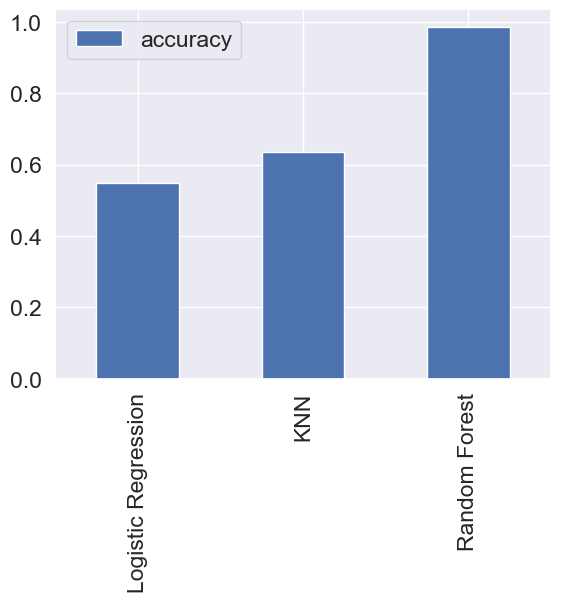

In [742]:
model_compare = pd.DataFrame(model_score, index = ["accuracy"])
model_compare.T.plot.bar()

In [743]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [744]:
# np.random.seed(2002)

# rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions= rf_grid, cv = 5, n_iter = 20, verbose = True)
# rs_rf.fit(X_train, y_train)

In [745]:
#rs_rf.best_params_

In [746]:
models["Random Forest"].score(X_test, y_test)

0.9858010630220198

In [747]:
y_pred = models["Random Forest"].predict(X_test)

In [748]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

In [749]:
roc_auc = metrics.auc(fpr, tpr)

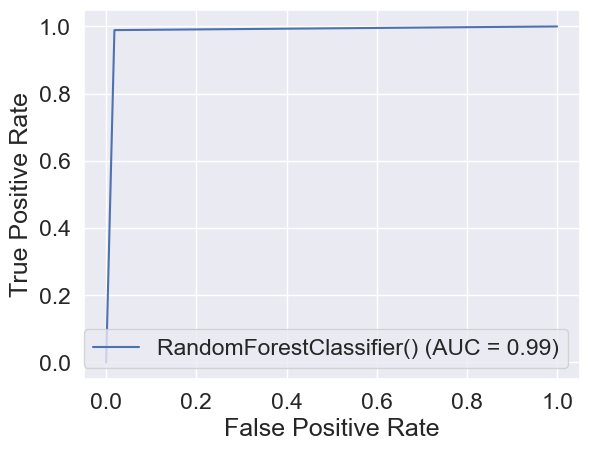

In [750]:
# import ROC curve function from sklearn
RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = models["Random Forest"]).plot()

In [751]:
y_preds = models["Random Forest"].predict(X_test)

In [762]:
# Confusion matrix
print(confusion_matrix(y_preds, y_test))

[[5796   79]
 [ 108 7187]]


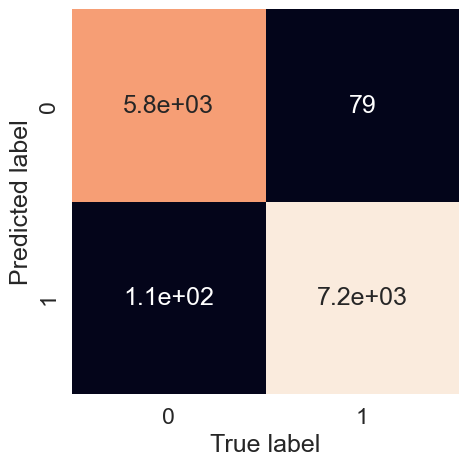

In [753]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize = (5, 5))
    ax = sns.heatmap(confusion_matrix(y_preds, y_test),
                    annot = True,
                    cbar = False, xticklabels = True, yticklabels = True)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

In [754]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5904
           1       0.99      0.99      0.99      7266

    accuracy                           0.99     13170
   macro avg       0.99      0.99      0.99     13170
weighted avg       0.99      0.99      0.99     13170



In [755]:
### Calculate evaluation metrics using cross-validation

clf = models["Random Forest"]

In [756]:
# Cross validated accuracy
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = "accuracy")
cv_acc = np.mean(cv_acc)

In [757]:
# Cross validated precision
cv_prec = cross_val_score(clf, X, y, cv = 5, scoring = 'precision')
cv_prec = np.mean(cv_prec)

In [758]:
# Cross validated recall
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = "recall")
cv_recall = np.mean(cv_recall)

KeyboardInterrupt: 

In [ ]:
# cross validated f1
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = "f1")
cv_f1 = np.mean(cv_f1)

In [ ]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prec,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index = [0])
cv_metrics.T.plot.bar(title = "Cross-validated classification metrics", legend = False);

### Feature important
Which feature contributed most to the outcomes of the model

In [759]:
importances = clf.feature_importances_

feature_names = X_train.columns
feature_importances = sorted(zip(importances, feature_names), reverse = True)

print("Feature importances:")
for importance, name in feature_importances:
    print(f"{name}: {importance}")

Feature importances:
actors: 0.40995145463125116
writer: 0.22152104506744855
director: 0.15297903898234008
production_company: 0.1358745843297979
age: 0.017116777154866595
genre: 0.016156905318310967
duration: 0.011369540424221551
language: 0.010747645734115154
country: 0.006868399173331627
date_published: 0.006075448776057696
worlwide_gross_income: 0.003431993361317984
budget: 0.0032419987506262108
usa_gross_income: 0.002999918561557962
change_title: 0.0016652497347564652


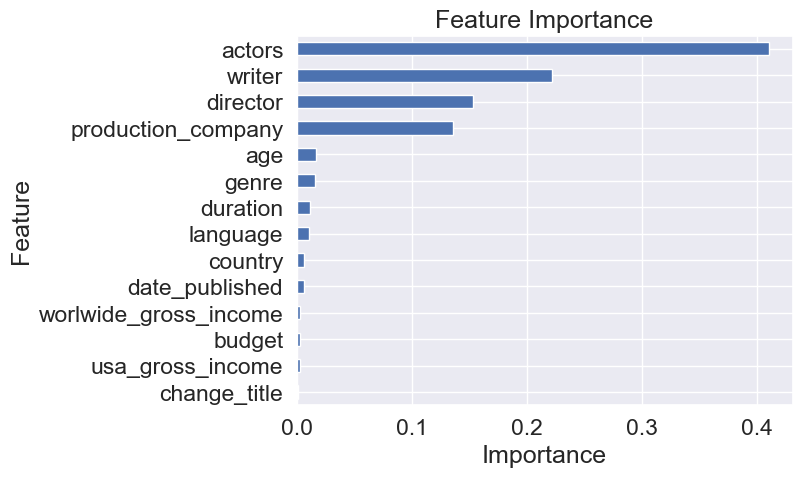

In [760]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'feature_importances' is a list of tuples where each tuple is (importance, feature_name)
# Let's convert that into a DataFrame for easier manipulation and visualization

# Convert to DataFrame
feature_df = pd.DataFrame(feature_importances, columns=['Importance', 'Feature'])

# Set index to 'Feature' for clarity in plotting
feature_df.set_index('Feature', inplace=True)

# Plotting
feature_df.sort_values(by='Importance', ascending=True).plot(kind='barh', title="Feature Importance", legend=False)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


6. Experimentation

In [761]:
from joblib import dump, load

model_filename = 'filmPredictModel.joblib'
dump(clf, model_filename)

['filmPredictModel.joblib']